# Домашна работа по предметот Методологија на истражувањето во икт

#### Индекс: 142039
#### Име: Димитар
#### Презиме: Димишков

#### За да филтрираме слика во фреквенциски домен потребно е да ја помножиме сликата во фреквенциски домен со филтерот (кернел) кој е исто така во фреквенциски домен.
 \begin{equation} I_{f,filt} = HI_f \end{equation}
 
####  За таа цел потребно е да се вметне Octave функција која ќе креира “Band pass gaussian filter” во фреквенциски домен. Bandpass гаусовиот филтер во фреквенциски домен е дефиниран со равенката:

\begin{equation} H(i,j) = e^{\frac{d(i,j)^2}{f_h^2}} (1 - e^{\frac{d(i,j)^2}{f_l^2}}) \end{equation}

#### Каде што 𝑑(𝑖,𝑗) е евклидовото растојанието на даден пиксел од центарот на сликата, додека 𝑓ℎ и 𝑓𝑙 се праговите на високите и ниските фреквенции кои сакаме
да ги филтрираме.

#### Конверзија на 2D сликата од просторен во фреквенциски домен се прави со користење на Фуриева трансформација. Фуриевата трансформација е дефинирана
како:

\begin{equation} F(u,v) = \iint \limits_{-\infty}^{\infty} f(x,y)e^{-i2\pi(ux+vy)}dxdy   \end{equation}

#### А во дискретниот домен горната равенка може да биде преведена како:

\begin{equation} F(u,v) = \mathop{\sum_{m=-\infty}^{\infty}\sum_{n=-\infty}^{\infty}} f[m,n]\cdot e^{-i2\pi(ux+vy)}dudv                          \end{equation}

#### Конверзија на 2D сликата од фреквенциски во просторен домен се прави со користење на инверзна Фуриева трансформација. Инверзната Фуриева
трансформација е дефинирана како:

\begin{equation} F(x,y) = \iint \limits_{-\infty}^{\infty} f(u,v) e^{-i2\pi(ux+vy)}dudv   \end{equation}

#### А во дискретниот домен горната равенка може да биде преведена како:

\begin{equation} F(x,y) = \mathop{\sum_{m=-\infty}^{\infty}\sum_{n=-\infty}^{\infty}} f[m,n] \cdot e^{-i2\pi(xmu_0+ynv_0)}                        \end{equation}


#### <p> Целите на оваа домашна е се искористат Фуриеви Трансформации на слики користејки го OpenCV - package во JupyterNotebook и да можеме да искористиме FastFourierTransform(FFT). Ке ги искористиме 2те функции кои ги нуди пакетот OpenCV , односно cv.dft() и cv.idft() </p>

#### Фуриевите Трансформации се користат за да се анализираат фрекфентните карактеристики на различни филтри. За слики , се користи 2D DFT и таа се користи за да се најдат фрекфентните домени. FFT алгоритамот се користи за калкулациите што ги користи DFT(cv.dft()).


### Ја користиме оваа формула за Дискретна Фуриева трансформација-DFT(Discrete Fourier Transform)

 \begin{equation} Ak = \sum\limits_{m=0}^{n-1}a_{m}exp \left\{ -2 \pi  \frac{mk}{n} \right\}  k=0,....,n-1   \end{equation}

### Ја користиме оваа формула за Инверзна Дискретна Фуриева трансформација- IDFT(Inverse Discrete Fourier Transform)

 \begin{equation} Ak = {1 \over n} \sum\limits_{m=0}^{n-1}a_{m}exp \left\{ -2 \pi  \frac{mk}{n} \right\}  m=0,....,n-1   \end{equation}

## Фуриеви Трансформации во Numpy

Најпрвин користиме FFT што ја поседува пакетот numpy односно np.fft.fft2() таа не снабдува со фрекфенциите кои што се во некоја низа. Функцијата прима како аргумент слика која што мора да бие во grayscale. Вториот аргумент е опционален и тоа е колкава да биде низата. Ако низата е поголема од големината на сликата таа ке биде наполнета со 0, во обратен случан сликата ќе биде скратена до големината на сликата.

Одкако ќе го добиеме резултатот , DC компонетната ке ни биде во левиот ќош од низата, за да го донесеме во средина користиме np.fft.fftshift(). Одкако ја пронаоѓаме фрекфенцијата, можеме да го пронајдеме магнитудниот спектрум.

На сликата подоле во средина се гледа бел регион што индицира дека таму имаме мала фрекфенција.



<IPython.core.display.Javascript object>


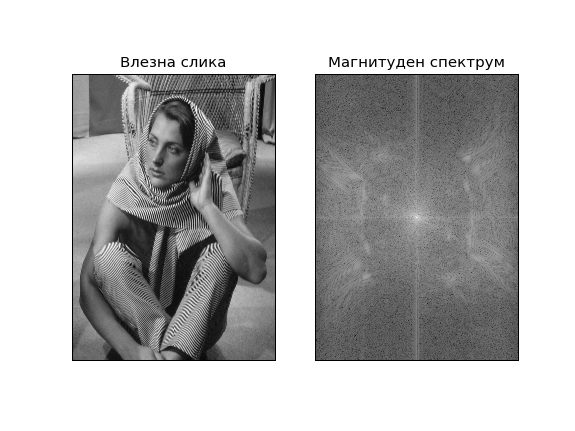

In [26]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib notebook

img = cv2.imread('Barbara.tif',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Влезна слика'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Магнитуден спектрум'), plt.xticks([]), plt.yticks([])
plt.show()

